In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
distorted_loc = os.path.join('/root', 'Dataset', 'L067', 'distorted') # change this directory for different configuration. ex) /root
gt_loc = os.path.join('/root', 'Dataset', 'L067', 'gt')

distorted_list = glob.glob(distorted_loc + '/*.npy')
distorted_list.sort()
gt_list = glob.glob(gt_loc + '/*.npy')
gt_list.sort()
print(len(distorted_list), len(gt_list))

560 560


In [3]:
patient_id_train = ['L067', 'L096', 'L143', 'L192', 'L291', 'L310', 'L333', 'L506']
dt_list_train = []
gt_list_train = []

for idx in patient_id_train:
    dt_list = glob.glob(os.path.join('/root', 'Dataset', idx, 'distorted', '*.npy'))
    dt_list.sort()
    dt_list_train.extend(dt_list)
    gt_list = glob.glob(os.path.join('/root', 'Dataset', idx, 'gt', '*.npy'))
    gt_list.sort()
    gt_list_train.extend(gt_list)
print(len(dt_list_train), len(dt_list_train))

5093 5093


Shape is (512, 512)


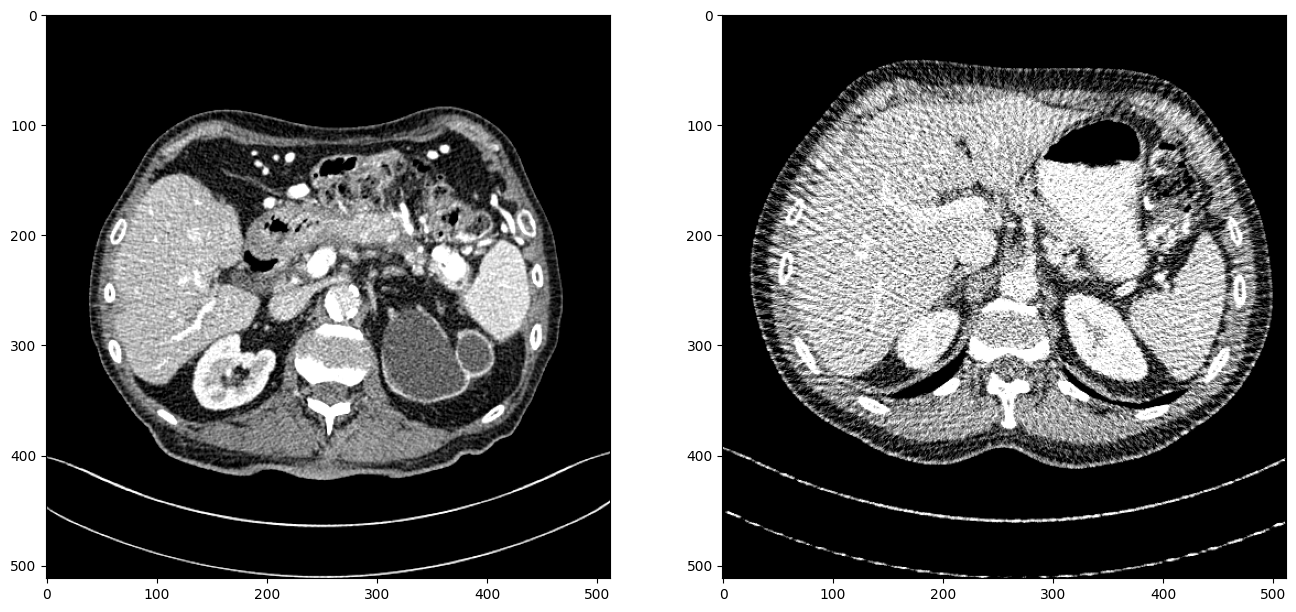

In [4]:
idx = 100
gt_img = np.load(gt_list[idx])
dis_img = np.load(distorted_list[idx])

disp_window = [-175 + 40, 175 + 40]

gt_img = gt_img.clip(disp_window[0], disp_window[1])
dis_img = dis_img.clip(disp_window[0], disp_window[1])

gt_img = (gt_img - disp_window[0]) / (disp_window[1] - disp_window[0])
dis_img = (dis_img - disp_window[0]) / (disp_window[1] - disp_window[0])

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(gt_img, cmap='gray')
axs[1].imshow(dis_img, cmap='gray')
print(f'Shape is {gt_img.shape}')